# DATA MINING ASSIGNMENT 3

## NIKHIL JOSHI

### Loan_Prediction dataset

In [233]:
import pandas as pd

# Reading the loan prediction csv file 
train_data = pd.read_csv("Data for Cleaning & Modeling.csv", low_memory = False)

# Reading the Holdout testing file
test_data = pd.read_csv("Holdout for Testing.csv", low_memory = False)

# Displaying the Loan prediction train data
train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [234]:
# Displaying the Holdout testing file
test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [235]:
# Renaming the training dataset column names for better reading
train_df = pd.DataFrame(train_data)
train_df.rename(columns = {'X1':'interest_rate', 'X2':'loan_id', 'X3':'borrower_id', 'X4':'loan_amt_req', 'X5':'loan_amt_funded', 'X6':'investor_fund_loan','X7':'payment_duration','X8':'loan_grade', 'X9':'loan_subgrade', 'X10':'job_title', 'X11':'service_length', 'X12':'home_status', 'X13':'annual_income','X14':'income_verify','X15':'loan_date','X16':'loan_reason','X17':'loan_category','X18':'loan_title','X19':'zipcode','X20':'state_borrow','X21':'dept_to_inc','X22':'30days_passed','X23':'borrow_earlycredit_date','X24':'no_enquiry6mnth','X25':'no_mnths_lastdeliquency','X26':'no_mnths_lastpublicrec','X27':'no_opencredit','X28':'no_derogatory','X29':'credit_baln','X30':'revolveline_utilizrate','X31':'total_opencredit','X32':'initial_loanstatus'},inplace = True)
train_df.head()

,interest_rate,loan_id,borrower_id,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,job_title,...,borrow_earlycredit_date,no_enquiry6mnth,no_mnths_lastdeliquency,no_mnths_lastpublicrec,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [236]:
# Renaming the testing dataset column names for better reading
test_df = pd.DataFrame(test_data)
test_df.rename(columns = {'X1':'interest_rate', 'X2':'loan_id', 'X3':'borrower_id', 'X4':'loan_amt_req', 'X5':'loan_amt_funded', 'X6':'investor_fund_loan','X7':'payment_duration','X8':'loan_grade', 'X9':'loan_subgrade', 'X10':'job_title', 'X11':'service_length', 'X12':'home_status', 'X13':'annual_income','X14':'income_verify','X15':'loan_date','X16':'loan_reason','X17':'loan_category','X18':'loan_title','X19':'zipcode','X20':'state_borrow','X21':'dept_to_inc','X22':'30days_passed','X23':'borrow_earlycredit_date','X24':'no_enquiry6mnth','X25':'no_mnths_lastdeliquency','X26':'no_mnths_lastpublicrec','X27':'no_opencredit','X28':'no_derogatory','X29':'credit_baln','X30':'revolveline_utilizrate','X31':'total_opencredit','X32':'initial_loanstatus'},inplace = True)
test_df.head()

,interest_rate,loan_id,borrower_id,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,job_title,...,borrow_earlycredit_date,no_enquiry6mnth,no_mnths_lastdeliquency,no_mnths_lastpublicrec,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


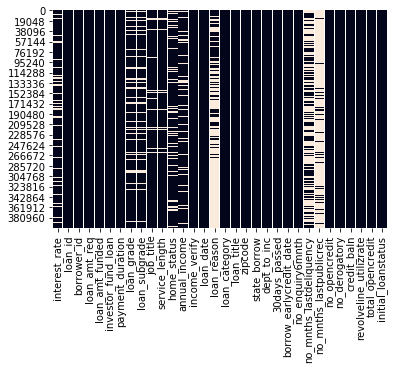

In [107]:
# Checking the null values in our train dataset through heat map

import seaborn as sns
sns.heatmap(train_df.isnull(), cbar=False)

After applying heat map on our train dataset we can see that there are significant null values present in our features. By closely observing we can see that **column 'loan_reason', 'no_mnths_lastdeliquency' and 'no_mnths_lastpublicrec' has the highest number of null values present**. Moreover, **columns 'interest_rate', 'loan_grade', 'loan_subgrade', 'job_title', 'service_length', 'home_status' and 'annual_income' has marginal lower null values present**.

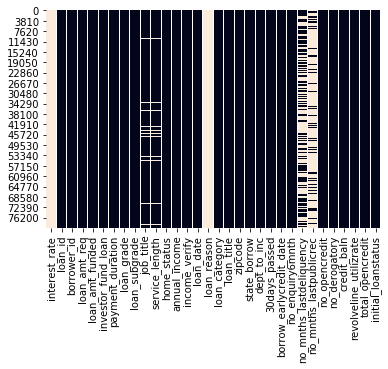

In [25]:
# Checking the null values in our test dataset through heat map

import seaborn as sns
sns.heatmap(test_df.isnull(), cbar=False)

Upon applying heatmap to our test dataset we can see the similar number of null values present in our test dataset, like in  **column 'loan_reason', 'no_mnths_lastdeliquency' and 'no_mnths_lastpublicrec'** have high null values present. On the other hand, column **'job_title' and 'service_length'** have marginal lower null values present.

Now, in order to make decisions on how to fill the null values we have to closely observe the columns and the types of values present in those columns. Also, we have to make the decisions of dropping some of the columns which have higher null values present in our dataset. Below is the function to check the percentage of null values present in each columns.

In [237]:
# Creating a function to find the missing values in columns
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [238]:
# Call the above function and passing the train dataset as parameter
missing_values_table(train_df)

Your selected dataframe has 32 columns.
There are 32 columns that have missing values.


,Missing Values,% of Total Values
no_mnths_lastpublicrec,348845,87.2
loan_reason,276440,69.1
no_mnths_lastdeliquency,218802,54.7
home_status,61361,15.3
loan_grade,61270,15.3
loan_subgrade,61270,15.3
annual_income,61028,15.3
interest_rate,61010,15.3
job_title,23986,6.0
service_length,17538,4.4


In [239]:
# Call the above function and passing the test dataset as parameter
missing_values_table(test_df)

Your selected dataframe has 32 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
interest_rate,80000,100.0
loan_reason,79985,100.0
no_mnths_lastpublicrec,66161,82.7
no_mnths_lastdeliquency,38704,48.4
job_title,4394,5.5
service_length,4382,5.5
revolveline_utilizrate,30,0.0


Now, its time for some data cleaning. Before handling the missing values we will first remove the unwanted columns from our dataset which does not provide any insights. We will closely observe each columns and make decisions to remove or not.

From the above table we can see that there are three columns having more than 50% of missing values. We can simply drop these columns as they do not bring any valuable information.

In [240]:
# Removing the top 3 columns from our train dataset and renaming our new dataset
drop_cols = ['no_mnths_lastpublicrec','loan_reason','no_mnths_lastdeliquency']
cleaned_train = train_df.drop(drop_cols, axis = 1)

# Removing the same columns on my test dataset and renaming it.
cleaned_test = test_df.drop(drop_cols, axis = 1)

#Checking the cleaned train file
cleaned_train.head()


,interest_rate,loan_id,borrower_id,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,job_title,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [241]:
# Checking the cleaned test file
cleaned_test.head()

,interest_rate,loan_id,borrower_id,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,job_title,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,28.31,0,2-Nov,1,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,16.03,0,Dec-68,1,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,32.49,0,Oct-98,0,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,32.96,0,Feb-99,1,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,31.03,0,2-Dec,0,27,0,31842,41.30%,43,w


We can see from above, our original dataset dimension have reduced to 29 columns from 32 columns. There are other columns as well which are not relevant and did not give much information. We will remove those columns as well.

   **loan_id** - It is a unique id. Dropping it.  
   **borrower_id** - It is also a unique id. Dropping it.  
   **job_title** - Job title is not anywhere related to interest rate. Dropping it.  
   **zipcode** - It has only first 3 numbers and does not bring much information. Dropping it.  

In [242]:
drop_cols = ['loan_id','borrower_id','job_title','zipcode']
# Dropping columns on train dataset
cleaned_train = cleaned_train.drop(drop_cols, axis = 1)

# Dropping column on test dataset
cleaned_test = cleaned_test.drop(drop_cols, axis = 1)

# Checking the train dataset
cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,service_length,home_status,annual_income,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [243]:
# Checking the test dataset
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,service_length,home_status,annual_income,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,"$6,000","$6,000","$6,000",36 months,C,C5,10+ years,MORTGAGE,68000.0,...,28.31,0,2-Nov,1,18,0,19861,64.50%,33,f
1,NaN,"$24,000","$24,000","$24,000",36 months,A,A1,8 years,RENT,110480.0,...,16.03,0,Dec-68,1,12,0,17001,26.20%,36,w
2,NaN,"$35,000","$35,000","$35,000",36 months,C,C2,10+ years,MORTGAGE,86000.0,...,32.49,0,Oct-98,0,16,0,25797,49.90%,33,w
3,NaN,"$10,000","$10,000","$10,000",60 months,D,D1,10+ years,RENT,30000.0,...,32.96,0,Feb-99,1,13,1,9586,43.80%,21,w
4,NaN,"$24,000","$24,000","$24,000",60 months,B,B1,10+ years,MORTGAGE,82500.0,...,31.03,0,2-Dec,0,27,0,31842,41.30%,43,w


After reducing our columns from our dataframe we can see that there are some impurities like the **'$'** sign and **'%'** sign present in our columns which are unnecessary. We will now remove these values. Also, our column **'payment_duration'** has all values in months, we will remove the word **'months'** as well. 

In [244]:
# Replacing the '$' sign from the required columns of train file
cleaned_train['loan_amt_req']= cleaned_train['loan_amt_req'].str.replace('$','').str.replace(',', '')
cleaned_train['loan_amt_funded'] = cleaned_train['loan_amt_funded'].str.replace('$', '').str.replace(',', '')
cleaned_train['investor_fund_loan'] = cleaned_train['investor_fund_loan'].str.replace('$', '').str.replace(',', '')

# Replacing the '$' sign from the required columns of test file
cleaned_test['loan_amt_req']= cleaned_test['loan_amt_req'].str.replace('$','').str.replace(',', '')
cleaned_test['loan_amt_funded'] = cleaned_test['loan_amt_funded'].str.replace('$', '').str.replace(',', '')
cleaned_test['investor_fund_loan'] = cleaned_test['investor_fund_loan'].str.replace('$', '').str.replace(',', '')

# Replacing the '%' sign from the required columns of train file
cleaned_train['interest_rate'] = cleaned_train['interest_rate'].str.replace('%', '')
cleaned_train['revolveline_utilizrate'] = cleaned_train['revolveline_utilizrate'].str.replace('%', '')

# Replacing the '%' sign from the required columns of test file
cleaned_test['revolveline_utilizrate'] = cleaned_test['revolveline_utilizrate'].str.replace('%', '')

# Replacing the 'month' from the required columns of train file
cleaned_train['payment_duration'] = cleaned_test['payment_duration'].str.replace('months', '')

# Replacing the 'month' from the required columns of test file
cleaned_test['payment_duration'] = cleaned_test['payment_duration'].str.replace('months', '')

cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,service_length,home_status,annual_income,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89,25000,25000,19080,36,B,B4,< 1 year,RENT,85000.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10,42.0,f
1,10.71,7000,7000,673,36,B,B5,< 1 year,RENT,65000.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70,7.0,f
2,16.99,25000,25000,24725,36,D,D3,1 year,RENT,70000.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30,17.0,f
3,13.11,1200,1200,1200,60,C,C2,10+ years,OWN,54000.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40,31.0,f
4,13.57,10800,10800,10692,60,C,C3,6 years,RENT,32000.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60,40.0,f


In [245]:
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,loan_subgrade,service_length,home_status,annual_income,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000,6000,6000,36,C,C5,10+ years,MORTGAGE,68000.0,...,28.31,0,2-Nov,1,18,0,19861,64.50,33,f
1,NaN,24000,24000,24000,36,A,A1,8 years,RENT,110480.0,...,16.03,0,Dec-68,1,12,0,17001,26.20,36,w
2,NaN,35000,35000,35000,36,C,C2,10+ years,MORTGAGE,86000.0,...,32.49,0,Oct-98,0,16,0,25797,49.90,33,w
3,NaN,10000,10000,10000,60,D,D1,10+ years,RENT,30000.0,...,32.96,0,Feb-99,1,13,1,9586,43.80,21,w
4,NaN,24000,24000,24000,60,B,B1,10+ years,MORTGAGE,82500.0,...,31.03,0,2-Dec,0,27,0,31842,41.30,43,w


Now, its time to check the number of null values present in each column and take the necessary actions to fill those NAs

In [246]:
# Finding the number of null values in each column
null_counts = cleaned_train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

null_counts = cleaned_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
interest_rate               61010
loan_amt_req                    1
loan_amt_funded                 1
investor_fund_loan              1
payment_duration           320000
loan_grade                  61270
loan_subgrade               61270
service_length              17538
home_status                 61361
annual_income               61028
income_verify                   1
loan_date                       1
loan_category                   1
loan_title                     19
state_borrow                    1
dept_to_inc                     1
30days_passed                   1
borrow_earlycredit_date         1
no_enquiry6mnth                 1
no_opencredit                   1
no_derogatory                   1
credit_baln                     1
revolveline_utilizrate        267
total_opencredit                1
initial_loanstatus              1
dtype: int64
Number of null values in each column:
interest_rate              80000
loan_amt_req                

In [247]:
# Checking the count of variables in loan grade column
cleaned_train['loan_grade'].value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: loan_grade, dtype: int64

Column 'loan_grade' has categorical data. Filling the NA values with higher frequency categorical value that is B

In [248]:
# Filling NA with B
cleaned_train['loan_grade'] = cleaned_train['loan_grade'].fillna('B')
cleaned_train['loan_grade'].value_counts()

B    162938
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: loan_grade, dtype: int64

Column **'loan_subgrade'** contains the redundant information which is already present in column **'loan_grade'**. We can get rid of 'loan_subgrade column.

In [249]:
# Dropping loan_subgrade column from train file
cleaned_train = cleaned_train.drop('loan_subgrade', axis = 1)

# Dropping loan_subgrade column from test file
cleaned_test = cleaned_test.drop('loan_subgrade', axis = 1)

cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89,25000,25000,19080,36,B,< 1 year,RENT,85000.0,VERIFIED - income,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10,42.0,f
1,10.71,7000,7000,673,36,B,< 1 year,RENT,65000.0,not verified,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70,7.0,f
2,16.99,25000,25000,24725,36,D,1 year,RENT,70000.0,VERIFIED - income,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30,17.0,f
3,13.11,1200,1200,1200,60,C,10+ years,OWN,54000.0,not verified,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40,31.0,f
4,13.57,10800,10800,10692,60,C,6 years,RENT,32000.0,not verified,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60,40.0,f


In [250]:
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000,6000,6000,36,C,10+ years,MORTGAGE,68000.0,VERIFIED - income,...,28.31,0,2-Nov,1,18,0,19861,64.50,33,f
1,NaN,24000,24000,24000,36,A,8 years,RENT,110480.0,VERIFIED - income,...,16.03,0,Dec-68,1,12,0,17001,26.20,36,w
2,NaN,35000,35000,35000,36,C,10+ years,MORTGAGE,86000.0,VERIFIED - income,...,32.49,0,Oct-98,0,16,0,25797,49.90,33,w
3,NaN,10000,10000,10000,60,D,10+ years,RENT,30000.0,VERIFIED - income source,...,32.96,0,Feb-99,1,13,1,9586,43.80,21,w
4,NaN,24000,24000,24000,60,B,10+ years,MORTGAGE,82500.0,VERIFIED - income,...,31.03,0,2-Dec,0,27,0,31842,41.30,43,w


In [251]:
# Checking value counts before filling NA
cleaned_train['home_status'].value_counts()

MORTGAGE    172112
RENT        136778
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: home_status, dtype: int64

Filling the NA values in column **'home_status'** with **Mortgage** as it is the higher frequency variable in the column.

In [252]:
# Filling NA with Mortgage
cleaned_train['home_status'] = cleaned_train['home_status'].fillna('MORTGAGE')

# Checking value counts after filling NA
cleaned_train['home_status'].value_counts()

MORTGAGE    233473
RENT        136778
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: home_status, dtype: int64

Filling the NA values for column 'annual_income' with the mean values.

In [253]:
# Filling NA values with mean
cleaned_train['annual_income'] = cleaned_train['annual_income'].fillna(value=cleaned_train["annual_income"].mean())

Removing the **loan_title** column from our dataframe as it does not seems useful for our model to predict interest rate and does not have any major impact on our target variable. 

In [254]:
# Dropping loan_title column from the train dataset.
cleaned_train = cleaned_train.drop('loan_title', axis = 1)

# Dropping loan_title column from the test dataset.
cleaned_test = cleaned_test.drop('loan_title', axis = 1)

cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89,25000,25000,19080,36,B,< 1 year,RENT,85000.0,VERIFIED - income,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10,42.0,f
1,10.71,7000,7000,673,36,B,< 1 year,RENT,65000.0,not verified,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70,7.0,f
2,16.99,25000,25000,24725,36,D,1 year,RENT,70000.0,VERIFIED - income,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30,17.0,f
3,13.11,1200,1200,1200,60,C,10+ years,OWN,54000.0,not verified,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40,31.0,f
4,13.57,10800,10800,10692,60,C,6 years,RENT,32000.0,not verified,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60,40.0,f


In [255]:
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000,6000,6000,36,C,10+ years,MORTGAGE,68000.0,VERIFIED - income,...,28.31,0,2-Nov,1,18,0,19861,64.50,33,f
1,NaN,24000,24000,24000,36,A,8 years,RENT,110480.0,VERIFIED - income,...,16.03,0,Dec-68,1,12,0,17001,26.20,36,w
2,NaN,35000,35000,35000,36,C,10+ years,MORTGAGE,86000.0,VERIFIED - income,...,32.49,0,Oct-98,0,16,0,25797,49.90,33,w
3,NaN,10000,10000,10000,60,D,10+ years,RENT,30000.0,VERIFIED - income source,...,32.96,0,Feb-99,1,13,1,9586,43.80,21,w
4,NaN,24000,24000,24000,60,B,10+ years,MORTGAGE,82500.0,VERIFIED - income,...,31.03,0,2-Dec,0,27,0,31842,41.30,43,w


Cleaning the **'service_length'** by replacing less than 1year to 0.5 because it is the minimum requirement to apply for a loan. Moreover, removing years, year and + sign from the column and filling our NA values with the mean because the average interest rate for less than 1 year and 1 year is same.

In [256]:
# Cleaning the train file
cleaned_train['service_length'] = cleaned_train['service_length'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')

# Cleaing the test file
cleaned_test['service_length'] = cleaned_test['service_length'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')

cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89,25000,25000,19080,36,B,0.5,RENT,85000.0,VERIFIED - income,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10,42.0,f
1,10.71,7000,7000,673,36,B,0.5,RENT,65000.0,not verified,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70,7.0,f
2,16.99,25000,25000,24725,36,D,1,RENT,70000.0,VERIFIED - income,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30,17.0,f
3,13.11,1200,1200,1200,60,C,10,OWN,54000.0,not verified,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40,31.0,f
4,13.57,10800,10800,10692,60,C,6,RENT,32000.0,not verified,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60,40.0,f


In [257]:
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000,6000,6000,36,C,10,MORTGAGE,68000.0,VERIFIED - income,...,28.31,0,2-Nov,1,18,0,19861,64.50,33,f
1,NaN,24000,24000,24000,36,A,8,RENT,110480.0,VERIFIED - income,...,16.03,0,Dec-68,1,12,0,17001,26.20,36,w
2,NaN,35000,35000,35000,36,C,10,MORTGAGE,86000.0,VERIFIED - income,...,32.49,0,Oct-98,0,16,0,25797,49.90,33,w
3,NaN,10000,10000,10000,60,D,10,RENT,30000.0,VERIFIED - income source,...,32.96,0,Feb-99,1,13,1,9586,43.80,21,w
4,NaN,24000,24000,24000,60,B,10,MORTGAGE,82500.0,VERIFIED - income,...,31.03,0,2-Dec,0,27,0,31842,41.30,43,w


## Dropping the NA From Interest Rate Column

We cannot impute any values into our Interest Rate Column because it is our response column. We need to drop the NA from this column.

In [258]:
# Dropping NA vaues from interest_rate column
cleaned_train = cleaned_train.dropna(subset=['interest_rate'])

After dropping the NA values from our interest column we will now drop NA values for our other columns which has only 1 NA values present.

In [259]:
cleaned_train = cleaned_train.dropna(subset=['interest_rate','loan_amt_req','loan_amt_funded','investor_fund_loan','payment_duration','income_verify','loan_date','loan_category','state_borrow','dept_to_inc','30days_passed','borrow_earlycredit_date','no_enquiry6mnth','no_opencredit','no_derogatory','credit_baln','total_opencredit','initial_loanstatus'])

## Changing the Datatype of the Columns

We have seen that some of the columns with numerical data have been assigned with data type as 'object'. Now, we will convert the data types of the columns to the correct data types.

In [227]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68033 entries, 0 to 79998
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   interest_rate            68033 non-null  object 
 1   loan_amt_req             68033 non-null  object 
 2   loan_amt_funded          68033 non-null  object 
 3   investor_fund_loan       68033 non-null  object 
 4   payment_duration         68033 non-null  object 
 5   loan_grade               68033 non-null  object 
 6   service_length           65957 non-null  object 
 7   home_status              68033 non-null  object 
 8   annual_income            68033 non-null  float64
 9   income_verify            68033 non-null  object 
 10  loan_date                68033 non-null  object 
 11  loan_category            68033 non-null  object 
 12  state_borrow             68033 non-null  object 
 13  dept_to_inc              68033 non-null  float64
 14  30days_passed         

In [228]:
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   interest_rate            0 non-null      float64
 1   loan_amt_req             80000 non-null  object 
 2   loan_amt_funded          80000 non-null  object 
 3   investor_fund_loan       80000 non-null  object 
 4   payment_duration         80000 non-null  object 
 5   loan_grade               80000 non-null  object 
 6   service_length           75618 non-null  object 
 7   home_status              80000 non-null  object 
 8   annual_income            80000 non-null  float64
 9   income_verify            80000 non-null  object 
 10  loan_date                80000 non-null  object 
 11  loan_category            80000 non-null  object 
 12  state_borrow             80000 non-null  object 
 13  dept_to_inc              80000 non-null  float64
 14  30days_passed         

In [295]:
# Changing the dataype of Objects to float, str and int accordingly in train file
cleaned_train['interest_rate'] = cleaned_train['interest_rate'].astype(float)
cleaned_train['loan_amt_req'] = cleaned_train['loan_amt_req'].astype(float)
cleaned_train['loan_amt_funded'] = cleaned_train['loan_amt_funded'].astype(float)
cleaned_train['investor_fund_loan'] = cleaned_train['investor_fund_loan'].astype(float)
cleaned_train['payment_duration'] = cleaned_train['payment_duration'].astype(int)
cleaned_train['service_length'] = cleaned_train['service_length'].astype(float)
cleaned_train['income_verify'] = cleaned_train['income_verify'].astype(int)
cleaned_train['loan_category'] = cleaned_train['loan_category'].astype(int)
cleaned_train['loan_date'] = cleaned_train['loan_date'].astype(int)
cleaned_train['state_borrow'] = cleaned_train['state_borrow'].astype(float)
cleaned_train['borrow_earlycredit_date'] = cleaned_train['borrow_earlycredit_date'].astype(int)
cleaned_train['revolveline_utilizrate'] = cleaned_train['revolveline_utilizrate'].astype(float)

# Changing the datatype of Objects to float, str and int accordingly in test file
cleaned_test['interest_rate'] = cleaned_test['interest_rate'].astype(float)
cleaned_test['loan_amt_req'] = cleaned_test['loan_amt_req'].astype(float)
cleaned_test['loan_amt_funded'] = cleaned_test['loan_amt_funded'].astype(float)
cleaned_test['investor_fund_loan'] = cleaned_test['investor_fund_loan'].astype(float)
cleaned_test['payment_duration'] = cleaned_test['payment_duration'].astype(int)
cleaned_test['service_length'] = cleaned_test['service_length'].astype(float)
cleaned_train['income_verify'] = cleaned_test['income_verify'].astype(int)
cleaned_test['loan_category'] = cleaned_test['loan_category'].astype(int)
cleaned_test['loan_category'] = cleaned_test['loan_category'].astype(int)
cleaned_test['borrow_earlycredit_date'] = cleaned_test['borrow_earlycredit_date'].astype(int)
cleaned_test['state_borrow'] = cleaned_test['state_borrow'].astype(float)
cleaned_test['revolveline_utilizrate'] = cleaned_test['revolveline_utilizrate'].astype(float)

In [262]:
# Filling the NA values of revolveline_utilizrate with the mean in train file
cleaned_train['revolveline_utilizrate'] = cleaned_train['revolveline_utilizrate'].fillna(value=cleaned_train["revolveline_utilizrate"].mean())

# Filling the NA values of revolveline_utilizrate with the mean in test file
cleaned_test['revolveline_utilizrate'] = cleaned_test['revolveline_utilizrate'].fillna(value=cleaned_test["revolveline_utilizrate"].mean())

## Converting Categorical values to Numerical

We have many columns like **'loan_grade', 'home_status', 'income_verify', 'loan_category' and 'initial_loanstatus'** which has categorical values and we will convert them into dummy values.

In [294]:
# instatiate sklearn's labelencoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encoding the categorical values in train file
cleaned_train['loan_grade'] = le.fit_transform(cleaned_train['loan_grade'])
cleaned_train['home_status'] = le.fit_transform(cleaned_train['home_status'])
cleaned_train['income_verify'] = le.fit_transform(cleaned_train['income_verify'])
cleaned_train['loan_category'] = le.fit_transform(cleaned_train['loan_category'])
cleaned_train['initial_loanstatus'] = le.fit_transform(cleaned_train['initial_loanstatus'])
cleaned_train['loan_date'] = le.fit_transform(cleaned_train['loan_date'])
cleaned_train['borrow_earlycredit_date'] = le.fit_transform(cleaned_train['borrow_earlycredit_date'])
cleaned_train['state_borrow'] = le.fit_transform(cleaned_train['state_borrow'])

# Encoding the categorical values in train file
cleaned_test['loan_grade'] = le.fit_transform(cleaned_test['loan_grade'])
cleaned_test['home_status'] = le.fit_transform(cleaned_test['home_status'])
cleaned_test['income_verify'] = le.fit_transform(cleaned_test['income_verify'])
cleaned_test['loan_category'] = le.fit_transform(cleaned_test['loan_category'])
cleaned_test['initial_loanstatus'] = le.fit_transform(cleaned_test['initial_loanstatus'])
cleaned_test['loan_date'] = le.fit_transform(cleaned_test['loan_date'])
cleaned_test['borrow_earlycredit_date'] = le.fit_transform(cleaned_test['borrow_earlycredit_date'])
cleaned_test['state_borrow'] = le.fit_transform(cleaned_test['state_borrow'])

cleaned_train.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,11.89,25000.0,25000.0,19080.0,36,1,0.5,4,85000.0,0,...,19.48,0.0,177,0.0,10.0,0.0,28854.0,52.1,42.0,0
1,10.71,7000.0,7000.0,673.0,36,1,0.5,4,65000.0,0,...,14.29,0.0,459,0.0,7.0,0.0,33623.0,76.7,7.0,0
2,16.99,25000.0,25000.0,24725.0,36,3,1.0,4,70000.0,0,...,10.50,0.0,273,0.0,10.0,0.0,19878.0,66.3,17.0,0
3,13.11,1200.0,1200.0,1200.0,60,2,10.0,3,54000.0,1,...,5.47,0.0,212,0.0,5.0,0.0,2584.0,40.4,31.0,0
4,13.57,10800.0,10800.0,10692.0,60,2,6.0,4,32000.0,0,...,11.63,0.0,133,1.0,14.0,0.0,3511.0,25.6,40.0,0


In [304]:
cleaned_test.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000.0,6000.0,6000.0,36,2,10.0,0,68000.0,0,...,28.31,0,47,1,18,0,19861,64.5,33,0
1,NaN,24000.0,24000.0,24000.0,36,0,8.0,2,110480.0,0,...,16.03,0,221,1,12,0,17001,26.2,36,1
2,NaN,35000.0,35000.0,35000.0,36,2,10.0,0,86000.0,0,...,32.49,0,562,0,16,0,25797,49.9,33,1
3,NaN,10000.0,10000.0,10000.0,60,3,10.0,2,30000.0,1,...,32.96,0,288,1,13,1,9586,43.8,21,1
4,NaN,24000.0,24000.0,24000.0,60,1,10.0,0,82500.0,0,...,31.03,0,40,0,27,0,31842,41.3,43,1


We have seen that some of the columns with numerical data have been assigned with data type as 'object'. Now, we will convert the data types of the columns to the correct data types.

In [274]:
# Filling NA values of Service lentgh column with mean in train file
cleaned_train['service_length'] = cleaned_train['service_length'].fillna(value=cleaned_train["service_length"].mean())

# Filling NA values of Service Length column with mean in test file
cleaned_test['service_length'] = cleaned_test['service_length'].fillna(value=cleaned_test["service_length"].mean())

**After cleaning and removing all our Null values from our dataset. We will now check last time if there are any missing values present in our test and train file below.**

In [275]:
# Finding null values in our cleaned train file
null_counts = cleaned_train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

# Finding null values in our cleaned test file
null_counts = cleaned_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
interest_rate              0
loan_amt_req               0
loan_amt_funded            0
investor_fund_loan         0
payment_duration           0
loan_grade                 0
service_length             0
home_status                0
annual_income              0
income_verify              0
loan_date                  0
loan_category              0
state_borrow               0
dept_to_inc                0
30days_passed              0
borrow_earlycredit_date    0
no_enquiry6mnth            0
no_opencredit              0
no_derogatory              0
credit_baln                0
revolveline_utilizrate     0
total_opencredit           0
initial_loanstatus         0
dtype: int64
Number of null values in each column:
interest_rate              80000
loan_amt_req                   0
loan_amt_funded                0
investor_fund_loan             0
payment_duration               0
loan_grade                     0
service_length                 0
home_status  

As we can see above we have cleaned our training dataset and test dataset and there are no null values to be found in any columns. Only the Interest column of our test file because it is the field which we want to predict.

In [453]:
# Assigning our cleaned train file to a new variable
cleaned_train_data = cleaned_train

# Checking the datatypes of all our columns.
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68033 entries, 0 to 79998
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   interest_rate            68033 non-null  float64
 1   loan_amt_req             68033 non-null  float64
 2   loan_amt_funded          68033 non-null  float64
 3   investor_fund_loan       68033 non-null  float64
 4   payment_duration         68033 non-null  int32  
 5   loan_grade               68033 non-null  int64  
 6   service_length           68033 non-null  float64
 7   home_status              68033 non-null  int64  
 8   annual_income            68033 non-null  float64
 9   income_verify            68033 non-null  int32  
 10  loan_date                68033 non-null  int32  
 11  loan_category            68033 non-null  int32  
 12  state_borrow             68033 non-null  float64
 13  dept_to_inc              68033 non-null  float64
 14  30days_passed         

In [272]:
# Assigning our cleaned test file to a new variable
cleaned_test_data = cleaned_test

cleaned_test_data

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,dept_to_inc,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus
0,NaN,6000.0,6000.0,6000.0,36,2,10.0,0,68000.0,0,...,28.31,0,47,1,18,0,19861,64.5,33,0
1,NaN,24000.0,24000.0,24000.0,36,0,8.0,2,110480.0,0,...,16.03,0,221,1,12,0,17001,26.2,36,1
2,NaN,35000.0,35000.0,35000.0,36,2,10.0,0,86000.0,0,...,32.49,0,562,0,16,0,25797,49.9,33,1
3,NaN,10000.0,10000.0,10000.0,60,3,10.0,2,30000.0,1,...,32.96,0,288,1,13,1,9586,43.8,21,1
4,NaN,24000.0,24000.0,24000.0,60,1,10.0,0,82500.0,0,...,31.03,0,40,0,27,0,31842,41.3,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,NaN,6400.0,6400.0,6400.0,36,0,8.0,0,50000.0,2,...,15.74,0,86,0,13,0,7185,47.9,15,0
79996,NaN,30000.0,30000.0,30000.0,60,4,8.0,0,92000.0,0,...,19.28,0,210,0,19,0,25151,51.3,38,0
79997,NaN,17600.0,17600.0,17600.0,36,3,2.0,0,70000.0,2,...,17.50,0,64,0,18,0,12161,37.1,36,0
79998,NaN,2500.0,2500.0,2500.0,36,2,10.0,0,80000.0,2,...,16.52,0,410,0,13,0,13031,76.7,23,0


## Modelling

Lets, first extract the target variable that is "Interest rate" from the table and our predictors from the train data

In [400]:
# Extracting the target variable
y = cleaned_train_data['interest_rate']


# Removing the interest column
X = cleaned_train_data.drop(['interest_rate'], axis = 1)

We will split our data into 80% for our training and remaining 20% for testing.

In [372]:
import sklearn.model_selection as cv
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=.20)

### Lets apply Linear Regression first and check

In [373]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [374]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = regressor.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.94


In [375]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 1.95


In [376]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
regressor.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = regressor.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 1.95


In [377]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(15)

,Actual,Predicted
0,7.90,7.848468
1,7.62,8.721138
2,13.80,12.840639
3,14.33,13.581904
4,10.16,12.114206
5,6.62,8.419736
6,11.26,10.802179
7,13.49,14.500284
8,11.99,11.086494
9,7.49,9.301962


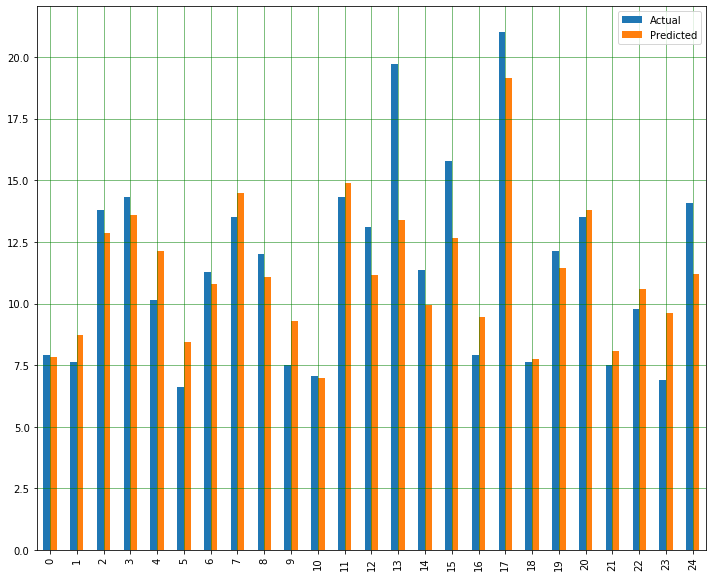

In [378]:
import matplotlib.pyplot as plt  
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Lets apply Decission Tree Regressor 

In [423]:
from sklearn.tree import DecisionTreeRegressor

(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=7,
                           min_samples_leaf=0.16,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.16, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [424]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 2.14


In [425]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))


CV RMSE: 2.14


In [426]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 2.14


In [427]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(15)

,Actual,Predicted
0,17.27,18.224233
1,11.12,12.673136
2,18.30,12.673136
3,11.99,12.673136
4,6.62,11.151516
5,7.74,7.447296
6,16.95,12.673136
7,8.49,7.447296
8,11.14,12.673136
9,10.99,12.673136


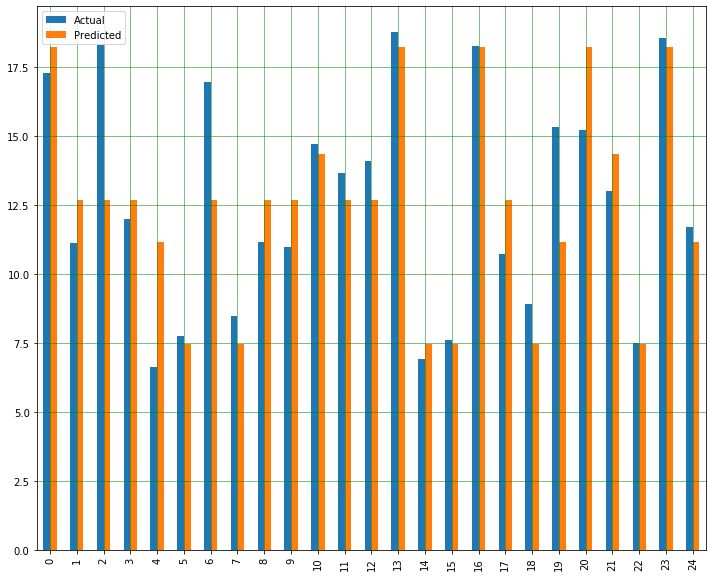

In [428]:
import matplotlib.pyplot as plt  
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Lets apply Random Forrest

In [429]:
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.3,
random_state=SEED)

In [441]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=280,
min_samples_leaf=0.12,
random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 2.48
Train set RMSE of rf: 2.44


In [435]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 2.44


In [436]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(15)

,Actual,Predicted
0,21.48,16.375674
1,11.99,12.687878
2,12.99,12.687878
3,7.51,7.451249
4,7.51,7.451249
5,14.33,16.375674
6,5.99,7.451249
7,13.23,16.375674
8,7.29,11.193912
9,13.11,12.681771


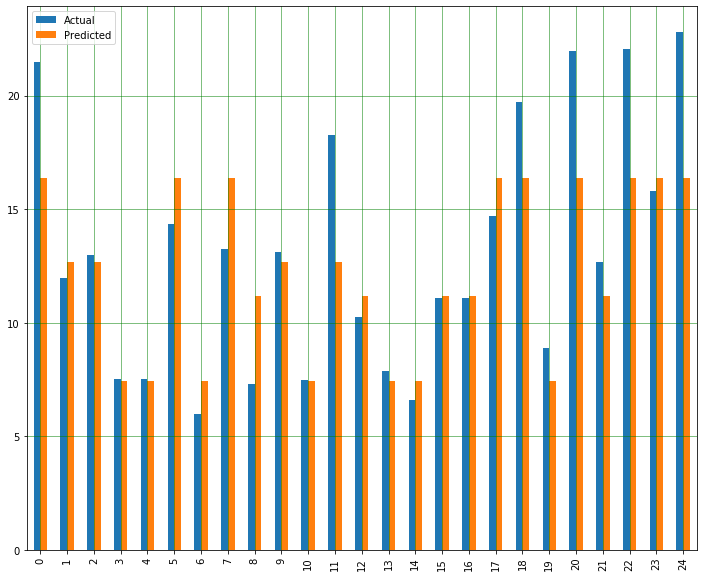

In [437]:
import matplotlib.pyplot as plt  
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## After Comparing the RMSE Scores of our Model Linear Regression is Performing better

**RMSE scores are a better measure of predicting the goodness of the models as it explains how close is our model in predicting the values of response variable with the minimum difference. This is the reason RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower the value of RMSE the better the model is. With our experiments above on the given dataset we have identified Linear regression to be our best model to preict our response variable because it has the lowest RMSE value of 1.95 as I did not divide the Interest rate column by 100. If I divide the RMSE score by 100 then I get a error of 0.0195 which is approx to 0.02. Which is the lowest value of RMSE scores compared to our other models. Below we will use Linear regression model to predict our response variable and store the value in our dataframe of our test dataset.**

In [456]:
cleaned_test_data = cleaned_test_data.drop("interest_rate", axis=1)

In [457]:
cleaned_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amt_req             80000 non-null  float64
 1   loan_amt_funded          80000 non-null  float64
 2   investor_fund_loan       80000 non-null  float64
 3   payment_duration         80000 non-null  int32  
 4   loan_grade               80000 non-null  int64  
 5   service_length           80000 non-null  float64
 6   home_status              80000 non-null  int64  
 7   annual_income            80000 non-null  float64
 8   income_verify            80000 non-null  int64  
 9   loan_date                80000 non-null  int64  
 10  loan_category            80000 non-null  int32  
 11  state_borrow             80000 non-null  float64
 12  dept_to_inc              80000 non-null  float64
 13  30days_passed            80000 non-null  int64  
 14  borrow_earlycredit_dat

In [458]:
# Using the linear regression to predict our cleaned test data
y_pred = regressor.predict(cleaned_test_data)
cleaned_test_data["interest_rate"] = y_pred

In [460]:
# Subituting the predicted values in our dataframe
cleaned_test_data = cleaned_test_data[["interest_rate","loan_amt_req","loan_amt_funded","investor_fund_loan","payment_duration","loan_grade","service_length","home_status","annual_income","income_verify","loan_date","loan_category","state_borrow","dept_to_inc","30days_passed","borrow_earlycredit_date","no_enquiry6mnth","no_opencredit","no_derogatory","credit_baln","revolveline_utilizrate","total_opencredit","initial_loanstatus","interest_rate"]]
cleaned_test_data.head()

,interest_rate,loan_amt_req,loan_amt_funded,investor_fund_loan,payment_duration,loan_grade,service_length,home_status,annual_income,income_verify,...,30days_passed,borrow_earlycredit_date,no_enquiry6mnth,no_opencredit,no_derogatory,credit_baln,revolveline_utilizrate,total_opencredit,initial_loanstatus,interest_rate
0,14.028288,6000.0,6000.0,6000.0,36,2,10.0,0,68000.0,0,...,0,47,1,18,0,19861,64.5,33,0,14.028288
1,9.392560,24000.0,24000.0,24000.0,36,0,8.0,2,110480.0,0,...,0,221,1,12,0,17001,26.2,36,1,9.392560
2,15.708553,35000.0,35000.0,35000.0,36,2,10.0,0,86000.0,0,...,0,562,0,16,0,25797,49.9,33,1,15.708553
3,16.686750,10000.0,10000.0,10000.0,60,3,10.0,2,30000.0,1,...,0,288,1,13,1,9586,43.8,21,1,16.686750
4,12.712130,24000.0,24000.0,24000.0,60,1,10.0,0,82500.0,0,...,0,40,0,27,0,31842,41.3,43,1,12.712130


In [461]:
cleaned_test_data.to_csv("Result.csv")